In [1]:
import torch
from transformers import LlamaTokenizer, LlamaForCausalLM
from tqdm import tqdm
from datasets import load_dataset
import copy
import csv
import matplotlib.pyplot as plt

In [2]:
ds = load_dataset("rmanluo/RoG-webqsp",split="validation")

100%|██████████| 246/246 [00:33<00:00,  7.41it/s]


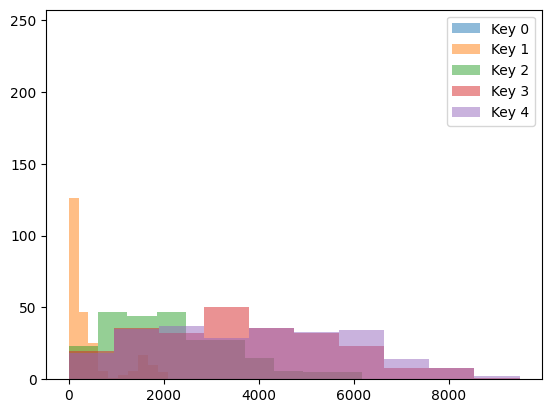

In [5]:
hop_num=4
lens=[]
for data in tqdm(ds):
    # print(len(data["graph"]))
    if(len(data["q_entity"])==0):
        lens.append({"0":[],"1":[],"2":[],"3":[],"4":[]})
        continue
    entities={"0":[data["q_entity"][0]],"1":[],"2":[],"3":[],"4":[]}
    hops=1
    while(hops<=hop_num):
        for g in data["graph"]:
            if(g[0] in entities[str(hops-1)]):
                entities[str(hops)].append(g[2])
        hops+=1
    lens.append(entities)
for dic in lens:
    for k, v in dic.items():
        for vv in v:
            if(vv.startswith('g.')or vv.startswith('m.')):
                del vv
keys = lens[0].keys()
lengths_per_key = {key: [] for key in keys}

# Collect the lengths of lists for each key across all dictionaries
for data in lens:
    for key in keys:
        lengths_per_key[key].append(len(data[key]))

# Plot the lengths for each key
for key in keys:
    plt.hist(lengths_per_key[key], label=f"Key {key}", alpha=0.5)

plt.legend()
plt.show()

In [19]:
for data in ds.select([0]):
    entities=[]
    for g in data["graph"]:
        if g[0] not in entities:
            entities.append(g[0])
        if g[2] not in entities:
            entities.append(g[2])
    print(len(entities))
    entities2 = [e for e in entities if (not e.startswith('g.') and not e.startswith('m.'))]
    print(len(set(entities2)))
    # for i in entities2:
    #     print(i)

1885
937


100%|██████████| 246/246 [00:33<00:00,  7.31it/s]


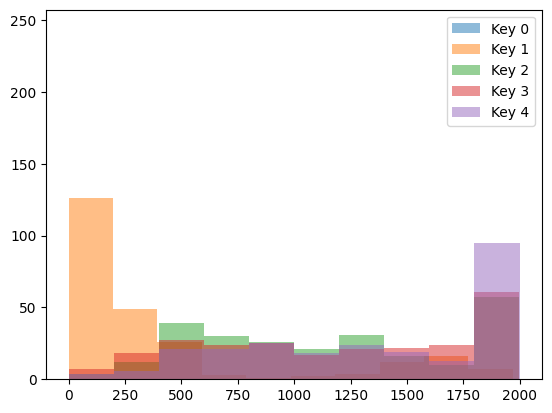

In [20]:

hop_num=4
lens=[]
for data in tqdm(ds):
    # print(len(data["graph"]))
    if(len(data["q_entity"])==0):
        lens.append({"0":[],"1":[],"2":[],"3":[],"4":[]})
        continue
    entities={"0":[data["q_entity"][0]],"1":[],"2":[],"3":[],"4":[]}
    hops=1
    while(hops<=hop_num):
        for g in data["graph"]:
            if(g[0] in entities[str(hops-1)] and g[2] not in entities[(str(hops))]):
                entities[str(hops)].append(g[2])
        hops+=1
    lens.append(entities)
# for dic in lens:
#     for k, v in dic.items():
#         for vv in v:
#             if(vv.startswith('g.')or vv.startswith('m.')):
#                 del vv
keys = lens[0].keys()
lengths_per_key = {key: [] for key in keys}

# Collect the lengths of lists for each key across all dictionaries
for data in lens:
    for key in keys:
        lengths_per_key[key].append(len(data[key]))

# Plot the lengths for each key
for key in keys:
    plt.hist(lengths_per_key[key], label=f"Key {key}", alpha=0.5)

plt.legend()
plt.show()

100%|██████████| 246/246 [00:33<00:00,  7.36it/s]


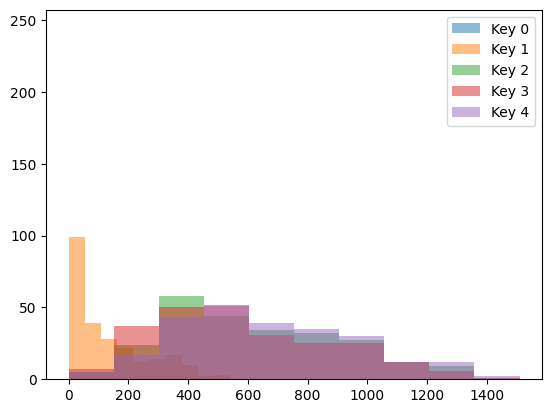

In [21]:

hop_num=4
lens=[]
for data in tqdm(ds):
    # print(len(data["graph"]))
    if(len(data["q_entity"])==0):
        lens.append({"0":[],"1":[],"2":[],"3":[],"4":[]})
        continue
    entities={"0":[data["q_entity"][0]],"1":[],"2":[],"3":[],"4":[]}
    hops=1
    while(hops<=hop_num):
        for g in data["graph"]:
            if(g[0] in entities[str(hops-1)] and g[2] not in entities[(str(hops))]):
                entities[str(hops)].append(g[2])
        hops+=1
    lens.append(entities)
# for dic in lens:
#     for k, v in dic.items():
#         for vv in v:
#             if(vv.startswith('g.')or vv.startswith('m.')):
#                 del vv
keys = lens[0].keys()
lengths_per_key = {key: [] for key in keys}

# Collect the lengths of lists for each key across all dictionaries
for data in lens:
    for key in keys:
        lengths_per_key[key].append(len([a for a in data[key] if (not a.startswith('g.') and not a.startswith('m.'))]))

# Plot the lengths for each key
for key in keys:
    plt.hist(lengths_per_key[key], label=f"Key {key}", alpha=0.5)

plt.legend()
plt.show()

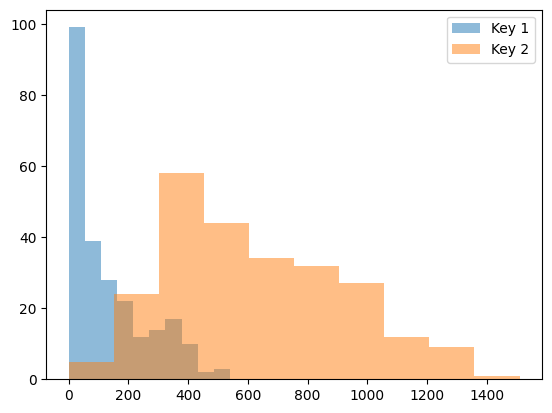

In [23]:
# Plot the lengths for each key
for key in ["1","2"]:
    plt.hist(lengths_per_key[key], label=f"Key {key}", alpha=0.5)

plt.legend()
plt.show()

In [30]:
ans_hops=[]
for idx, row in enumerate(ds):
    find=False
    for k,v in lens[idx].items():
        # if(k!="0"):
        #     print(v)
        #     assert()      
        if(row["a_entity"][0] in v):
            # print("hi")
            find=True
            ans_hops.append(int(k))
            break
    if not find:
        ans_hops.append(0)

In [31]:
for i in range(5):
    print(f'{i} hop count : {ans_hops.count(i)}')

0 hop count : 12
1 hop count : 148
2 hop count : 86
3 hop count : 0
4 hop count : 0
